In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

In [6]:
iris = datasets.load_iris()
dfiris= pd.DataFrame(iris.data, columns= iris.feature_names)
dfiris['target']=iris.target
dfiris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Avec 8 clusters

In [96]:
km8=KMeans(n_clusters=8)
X= dfiris.iloc[:,[0,1,2,3]]
y=dfiris.iloc[:,[4]]
km8.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


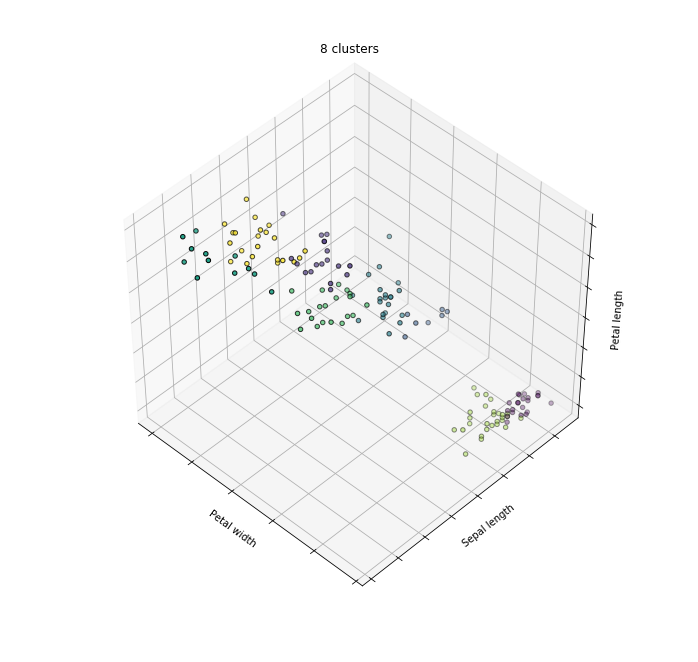

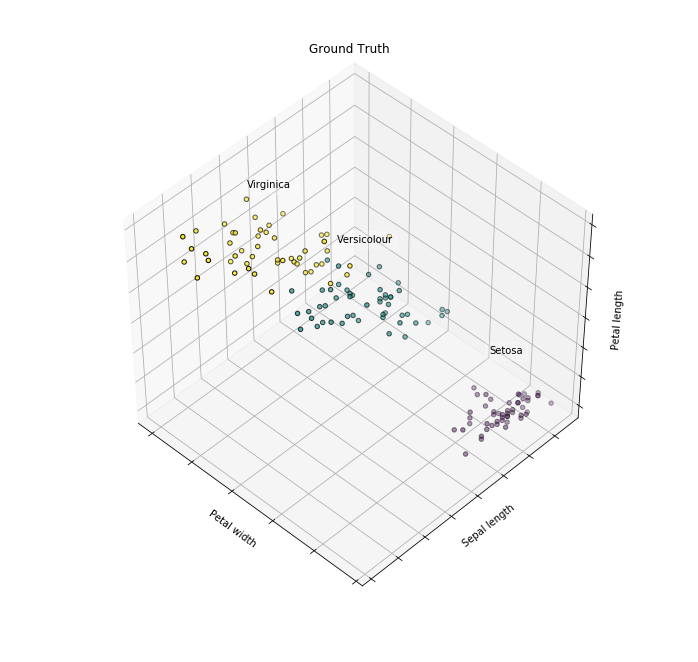

In [75]:
fig = plt.figure(1,figsize=(10, 9)) #Taille de la figure de base
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) #On fixe les bases de notre graphique 3D rect: donne les dimenssion du rectangle ()
labels = km8.labels_ 
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2], #On choisie nos 3 axes de résultat 
           c=labels.astype(np.float), edgecolor='k') #On fixe nos couleurs en labels (On spécifie qu'on les veux en float ?)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('8 clusters')
ax.dist = 12

fig = plt.figure(2, figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(dfiris.iloc[:,3].loc[dfiris.iloc[:,4] == label].mean(),
              dfiris.iloc[:,0].loc[dfiris.iloc[:,4]== label].mean(),
              dfiris.iloc[:,2].loc[dfiris.iloc[:,4]==label].mean() +2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(dfiris.iloc[:, 3], dfiris.iloc[:, 0], dfiris.iloc[:, 2], c=dfiris.iloc[:,4], edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## Avec 3 Cluster

In [81]:
km3=KMeans(n_clusters=3)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


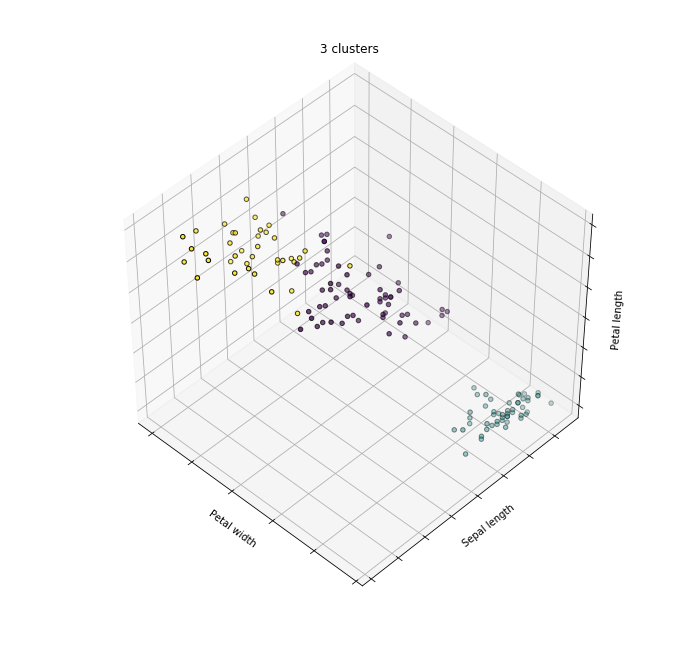

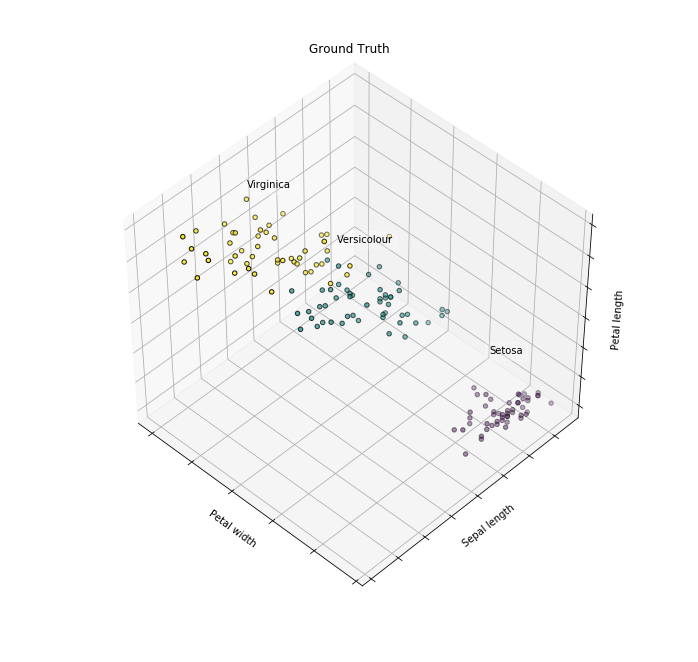

In [101]:
fig = plt.figure(1,figsize=(10, 9)) #Taille de la figure de base
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) #On fixe les bases de notre graphique 3D rect: donne les dimenssion du rectangle ()
label3 = km3.labels_ 
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2], #On choisie nos 3 axes de résultat 
           c=label3.astype(np.float), edgecolor='k') #On fixe nos couleurs en labels (On spécifie qu'on les veux en float ?)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('3 clusters')
ax.dist = 12

fig = plt.figure(2, figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(dfiris.iloc[:,3].loc[dfiris.iloc[:,4] == label].mean(),
              dfiris.iloc[:,0].loc[dfiris.iloc[:,4]== label].mean(),
              dfiris.iloc[:,2].loc[dfiris.iloc[:,4]==label].mean() +2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(dfiris.iloc[:, 3], dfiris.iloc[:, 0], dfiris.iloc[:, 2], c=dfiris.iloc[:,4], edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## 3 Cluster mais on joue sur les autres paramètre

In [87]:
kminit=KMeans(n_clusters=3,n_init=1, init="random")
kminit.fit(X)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


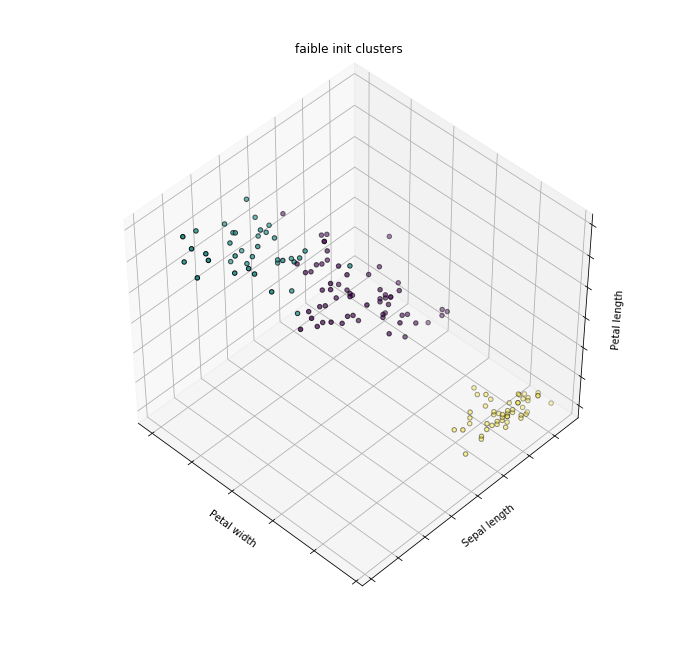

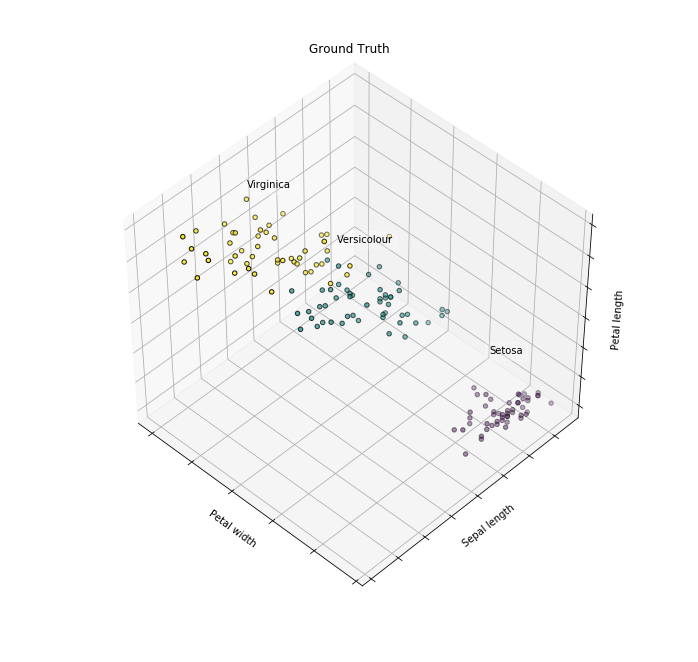

In [88]:
fig = plt.figure(1,figsize=(10, 9)) #Taille de la figure de base
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) #On fixe les bases de notre graphique 3D rect: donne les dimenssion du rectangle ()
labelinit = kminit.labels_ 
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2], #On choisie nos 3 axes de résultat 
           c=labelinit.astype(np.float), edgecolor='k') #On fixe nos couleurs en labels (On spécifie qu'on les veux en float ?)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('faible init clusters')
ax.dist = 12

fig = plt.figure(2, figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(dfiris.iloc[:,3].loc[dfiris.iloc[:,4] == label].mean(),
              dfiris.iloc[:,0].loc[dfiris.iloc[:,4]== label].mean(),
              dfiris.iloc[:,2].loc[dfiris.iloc[:,4]==label].mean() +2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(dfiris.iloc[:, 3], dfiris.iloc[:, 0], dfiris.iloc[:, 2], c=dfiris.iloc[:,4], edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

### Comparatif global !

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


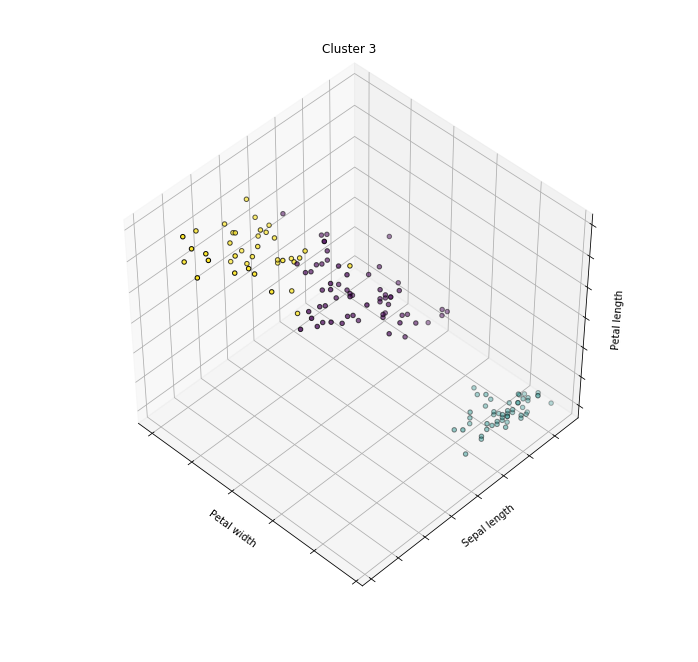

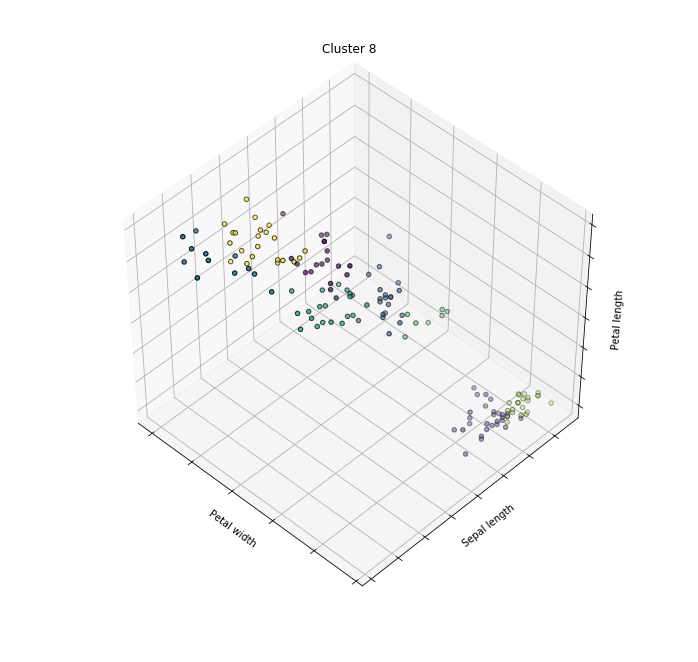

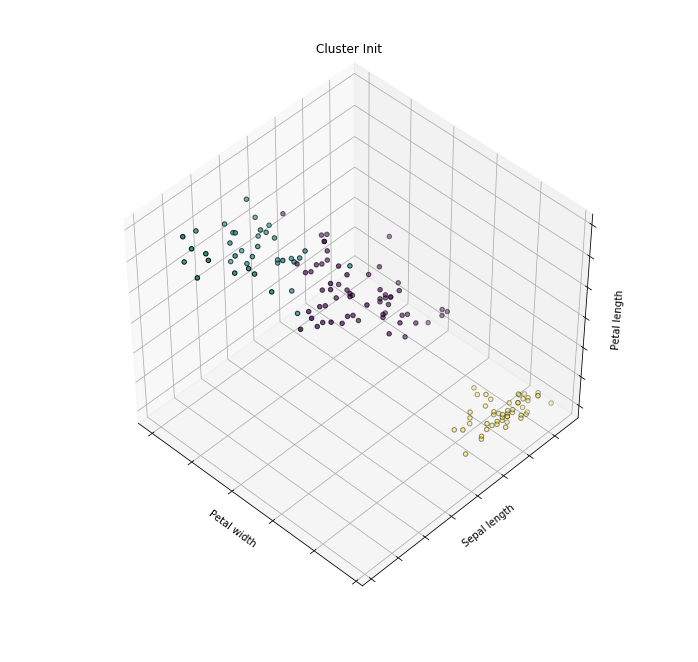

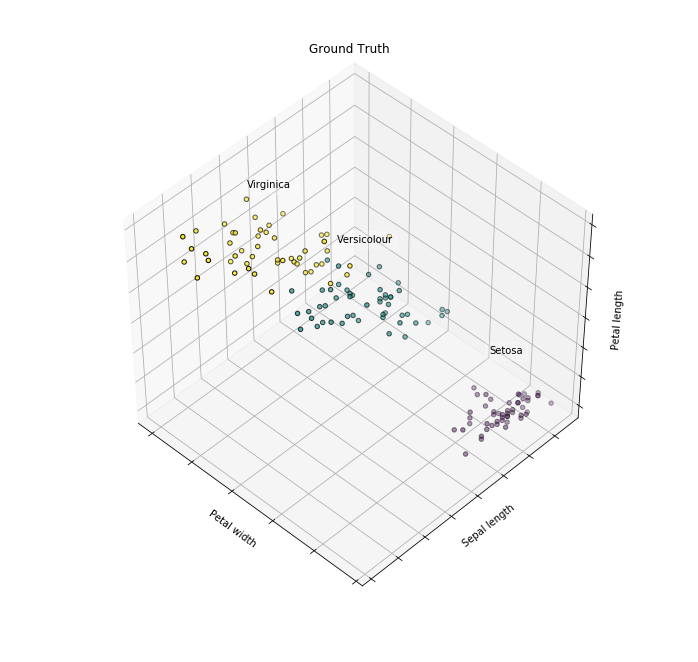

In [95]:
liste= [km3,km8,kminit]
title=["Cluster 3","Cluster 8","Cluster Init"]

fignum=1
for i in liste:
    fig = plt.figure(fignum,figsize=(10, 9)) #Taille de la figure de base
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) #On fixe les bases de notre graphique 3D rect: donne les dimenssion du rectangle ()
    labelss = i.labels_ 
    ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2], #On choisie nos 3 axes de résultat 
               c=labelss.astype(np.float), edgecolor='k') #On fixe nos couleurs en labels (On spécifie qu'on les veux en float ?)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(title[fignum-1])
    ax.dist = 12
    fignum= fignum + 1

fig = plt.figure(fignum, figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)   
    
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(dfiris.iloc[:,3].loc[dfiris.iloc[:,4] == label].mean(),
              dfiris.iloc[:,0].loc[dfiris.iloc[:,4]== label].mean(),
              dfiris.iloc[:,2].loc[dfiris.iloc[:,4]==label].mean() +2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))


# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(dfiris.iloc[:, 3], dfiris.iloc[:, 0], dfiris.iloc[:, 2], c=dfiris.iloc[:,4], edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12


fig.show()
